# <span style="color:red"> NUMERICAL EXERCISES 11 </span>

## <span style="color:blue">Exercise 11.1</span>

In this exercise I approach Machine Learning (TensorFlow and Keras libraries) with the simplest of neural networks: a neuron with no activation function. 
The text of the exercise presents code that uses such a neural network for a regression exercise.

The data (X,Y) used to perform the regression are:
- X: $x_i$ abscissae of points in $(-1,1)$;
- Y: $f(x_i)+G(0,\sigma)$
where $f(x)=2x+1$ and $G(0,\sigma)$ is Gaussian noise with mean zero and standard deviation $\sigma$.

The regression is carried out by optimizing, using the neural network, a cost function, for the training data.
Mean Square Error (MSE) is used as the cost function.

The exercise is to vary some characteristic parameters of the NNs, such as the **number of epochs** $N_{epochs}$, the number of **training data** $N_{train}$ and the **noise intensity** $\sigma$, leaving the other two fixed at the values given by the text ($N_{epochs}=30$, $N_{train}=500$, $\sigma=0$) and analyze the graphs of the cost function evaluated on the validation data. I will try to optimize my results modifying the value of these quantities.

Before carrying it out, I report the code provided by the text.

##### COPY OF GALLI'S CODE: FIT OF  $y = 2x + 1$ WITH NEURAL NETWORKS

DEFINITION OF THE FUNCTION AND CREATION OF TRAINING AND VALIDATION DATA

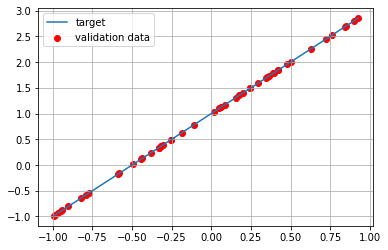

In [3]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

MODEL CONSTRUCTION

In [4]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K # not used (i think)
from tensorflow.keras.utils import get_custom_objects # not used (i think)

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


FIT OF THE MODEL DURING THE EPOCHS

In [3]:
# fit the model using training dataset
# over 30 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 1s 29ms/step - loss: 4.6711 - mse: 4.6711 - val_loss: 3.5793 - val_mse: 3.5793
Epoch 2/30
16/16 [==============================] - 0s 4ms/step - loss: 3.5635 - mse: 3.5635 - val_loss: 2.7730 - val_mse: 2.7730
Epoch 3/30
16/16 [==============================] - 0s 5ms/step - loss: 2.7612 - mse: 2.7612 - val_loss: 2.1757 - val_mse: 2.1757
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 2.1638 - mse: 2.1638 - val_loss: 1.7261 - val_mse: 1.7261
Epoch 5/30
16/16 [==============================] - 0s 5ms/step - loss: 1.7122 - mse: 1.7122 - val_loss: 1.3726 - val_mse: 1.3726
Epoch 6/30
16/16 [==============================] - 0s 5ms/step - loss: 1.3577 - mse: 1.3577 - val_loss: 1.0978 - val_mse: 1.0978
Epoch 7/30
16/16 [==============================] - 0s 7ms/step - loss: 1.0831 - mse: 1.0831 - val_loss: 0.8815 - val_mse: 0.8815
Epoch 8/30
16/16 [==============================] - 0s 6ms/step - loss: 0.8674 - mse: 0.8

WEIGHT (angular coefficent) AND BIAS (intercept) PRINTING

In [4]:
# return weights and biases
model.get_weights()

[array([[1.8647114]], dtype=float32), array([0.9988801], dtype=float32)]

LOSS AND ACCURACY CALCULATION ON VALIDATION DATA 

In [5]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 7ms/step - loss: 0.0058 - mse: 0.0058

Test loss: 0.005823931191116571
Test accuracy: 0.005823931191116571


LOSS AND ACCURACY CALCULATION ON THE EXACT CURVE

In [6]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 6ms/step - loss: 0.0058 - mse: 0.0058

Test loss: 0.005823931191116571
Test accuracy: 0.005823931191116571


TRAINING AND VALIDATION DATA LOSS GRAPH

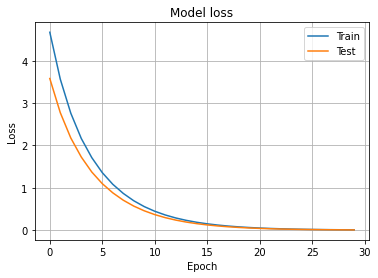

In [7]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

PREDICTION FOR NEW DATA

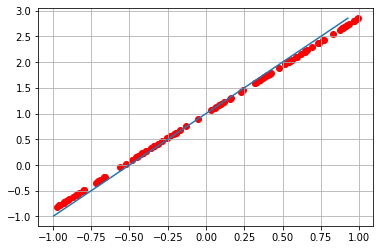

In [8]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

###### TUNING OF $N_{\mathrm{epochs}}$: 20, 30, 40, 50, 60, 70, 80, 90, 100, 200

By varying the number of epochs, I expect the result to improve as the number of epochs increases. 

The graphs certify this expectation: above 50 epochs the cost function on the validation data is practically zero.

In [9]:
N_epochs = [20,30,40,50,60,70,80,90,100,200]
m = np.zeros(10)
q = np.zeros(10)
loss = np.zeros(10)

for i in range(10):
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))

    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    # get a summary of our composed model
    model.summary()

    history = model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=N_epochs[i],
              shuffle=True, # a good idea is to shuffle input before at each epoch
              validation_data=(x_valid, y_valid))

    # return weights and biases
    w = model.get_weights()
    m[i] = w[0]
    q[i] = w[1]
    
    # evaluate model
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

    # print performance
    loss[i] = score[0]

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
16/16 [==============================] - 1s 41ms/step - loss: 4.0580 - mse: 4.0580 - val_loss: 3.0731 - val_mse: 3.0731
Epoch 2/20
16/16 [==============================] - 0s 8ms/step - loss: 3.0562 - mse: 3.0562 - val_loss: 2.3654 - val_mse: 2.3654
Epoch 3/20
16/16 [==============================] - 0s 6ms/step - loss: 2.3562 - mse: 2.3562 - val_loss: 1.8514 - val_mse: 1.8514
Epoch 4/20
16/16 [==============================] - 0s 7ms/step - loss: 1.8429 - mse: 1.8429 - val_loss: 1.4626 - val_mse: 1.4626
Epoch 5/20
16/16 [==============================] - 0s 4ms/step - l

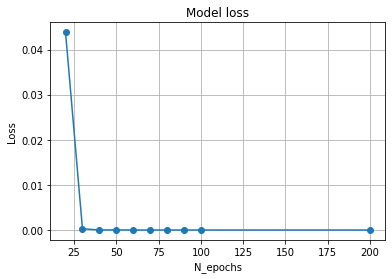

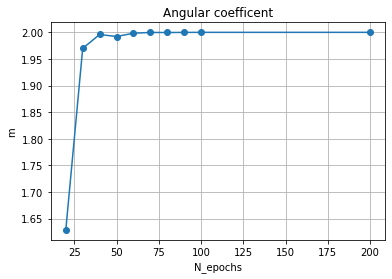

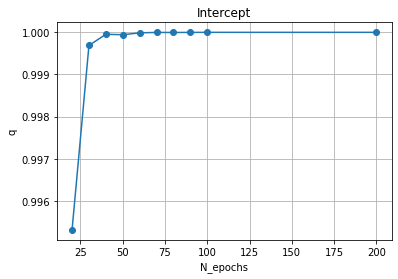

In [10]:
plt.plot(N_epochs, loss,  marker='o')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('N_epochs')
plt.grid(True)
plt.show()

plt.plot(N_epochs, m,  marker='o')
plt.title('Angular coefficent')
plt.ylabel('m')
plt.xlabel('N_epochs')
plt.grid(True)
plt.show()

plt.plot(N_epochs, q,  marker='o')
plt.title('Intercept')
plt.ylabel('q')
plt.xlabel('N_epochs')
plt.grid(True)
plt.show()

###### TUNING OF $N_{\mathrm{train}}$: 50, 100, 250, 325,  500, 625, 750, 1000, 1500, 2000 

By varying the number of training data, I expect the result to improve as the number of epochs increases. 

The graphs certify this expectation: above 500 training data the cost function on the validation data is practically zero.

In [11]:
N_train = [2000,1500,1000,750,625,500,375,250,100,50]
m = np.zeros(10)
q = np.zeros(10)
loss = np.zeros(10)
m_true = 2
q_true =1

x_train = np.random.uniform(-1, 1, 2000)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m_true * x_valid + q_true # ideal (target) linear function

sigma = 0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m_true * x_train + q_true, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m_true * x_valid + q_true, sigma)

for i in range(10):
    x_train=x_train[0:N_train[i]]
    y_train=y_train[0:N_train[i]]
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))

    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    # get a summary of our composed model
    model.summary()

    history = model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=30,
              shuffle=True, # a good idea is to shuffle input before at each epoch
              validation_data=(x_valid, y_valid))

    # return weights and biases
    w = model.get_weights()
    m[i] = w[0]
    q[i] = w[1]
    
    # evaluate model
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

    # print performance
    loss[i] = score[0]

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
63/63 [==============================] - 1s 4ms/step - loss: 2.3219 - mse: 2.3219 - val_loss: 1.2682 - val_mse: 1.2682
Epoch 2/30
63/63 [==============================] - 0s 2ms/step - loss: 0.8435 - mse: 0.8435 - val_loss: 0.4987 - val_mse: 0.4987
Epoch 3/30
63/63 [==============================] - 0s 3ms/step - loss: 0.3492 - mse: 0.3492 - val_loss: 0.2076 - val_mse: 0.2076
Epoch 4/30
63/63 [==============================] - 0s 4ms/step - loss: 0.1477 - mse: 0.1477 - val_loss: 0.0877 - val_mse: 0.0877
Epoch 5/30
63/63 [==============================] - 0s 4ms/step - l

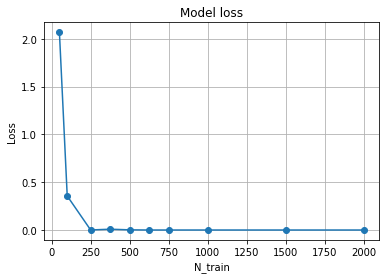

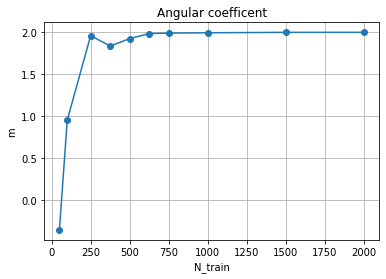

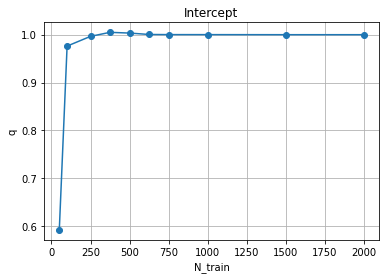

In [12]:
plt.plot(N_train, loss,  marker='o')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('N_train')
plt.grid(True)
plt.show()

plt.plot(N_train, m,  marker='o')
plt.title('Angular coefficent')
plt.ylabel('m')
plt.xlabel('N_train')
plt.grid(True)
plt.show()

plt.plot(N_train, q,  marker='o')
plt.title('Intercept')
plt.ylabel('q')
plt.xlabel('N_train')
plt.grid(True)
plt.show()

###### TUNING OF $\sigma$: 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9

By varying the Gaussian noise, I expect in general the result to get worse, and the graphs certify this expectation.

In [13]:
sigma = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
m = np.zeros(10)
q = np.zeros(10)
loss = np.zeros(10)

x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m_true * x_valid + q_true # ideal (target) linear function


for i in range(10):
    
    y_train = np.random.normal(m_true * x_train + q_true, sigma[i]) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(m_true * x_valid + q_true, sigma[i])
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))

    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    # get a summary of our composed model
    model.summary()

    history = model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=30,
              shuffle=True, # a good idea is to shuffle input before at each epoch
              validation_data=(x_valid, y_valid))

    # return weights and biases
    w = model.get_weights()
    m[i] = w[0]
    q[i] = w[1]
    
    # evaluate model
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

    # print performance
    loss[i] = score[0]

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
16/16 [==============================] - 1s 12ms/step - loss: 1.0037 - mse: 1.0037 - val_loss: 0.6620 - val_mse: 0.6620
Epoch 2/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6010 - mse: 0.6010 - val_loss: 0.4000 - val_mse: 0.4000
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 0.3757 - mse: 0.3757 - val_loss: 0.2545 - val_mse: 0.2545
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 0.2464 - mse: 0.2464 - val_loss: 0.1713 - val_mse: 0.1713
Epoch 5/30
16/16 [==============================] - 0s 4ms/step - 

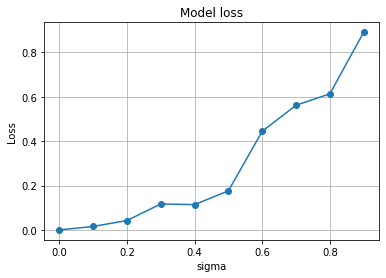

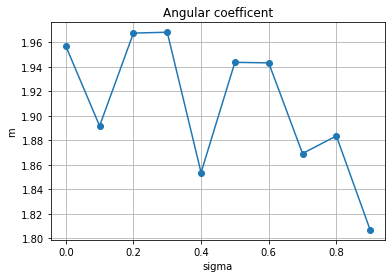

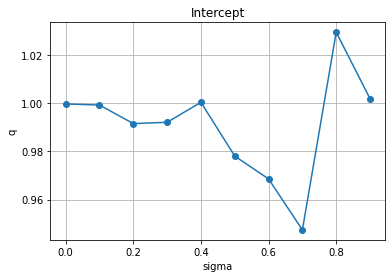

In [14]:
plt.plot(sigma, loss,  marker='o')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('sigma')
plt.grid(True)
plt.show()

plt.plot(sigma, m,  marker='o')
plt.title('Angular coefficent')
plt.ylabel('m')
plt.xlabel('sigma')
plt.grid(True)
plt.show()

plt.plot(sigma, q,  marker='o')
plt.title('Intercept')
plt.ylabel('q')
plt.xlabel('sigma')
plt.grid(True)
plt.show()

###### CONCLUSIONS
1) >500 training data and >50 epochs seem good numbers for these quantities (in this problem and in problems of similar complexity)

2) The best value of sigma is obviously zero, but the models trained with sigma different from zero are probably more useful in real problems, where there may be some noise.

## <span style="color:blue">Exercise 11.2</span>

In this exercise I again use a neural network to perform a regression, but unlike before, the function f is no longer linear but is a third-degree polynomial:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.


Because of the nonlinearity of the function, I can no longer use the neural network consisting of a single neuron without an activation function, so I have to work out a more complex neural network and set the parameters intelligently.
On the other hand, I expect that an extremely complex neural network is not needed to fit a third-degree polynomial, but a few neurons in a few layers are sufficient.

To develop a simple neural network that gives good results, I built:
- 10 "models" (few parameters) of increasing complexity of neural networks: ranging from the model in the previous exercise to a 33-parameter network;
- 2 "supermodels" (many parameters) at 645 and 701 parameters, one 'rhombus-shaped' and one 'pyramid-shaped'.

To test these models I used the following parameters:

- number of epochs: $N_{epochs} = 100$. I chose such a high number to allow even relatively simple networks to achieve good convergence;
- number of training data: $N_{train}=2000$. For the same reason above I raised this parameter;
- activation functions: _none_ for output layer (I realized it was advantageous for networks), _selu_ for all other layers (initially I tried _relu_, but some processes did not converge and their loss stagnated around a value, then I tried _sigmoid_, but convergence was too slow);
- optimizer: _sgd_;
- loss function: _mse_;
- noise: I tested all models both without noise and with Gaussian noise at $\sigma=0.2$.

The models and supermodels used can be seen in the figures preceding the code. If the JN does not load images, they can be found in the "Images" folder

##### MODELS:
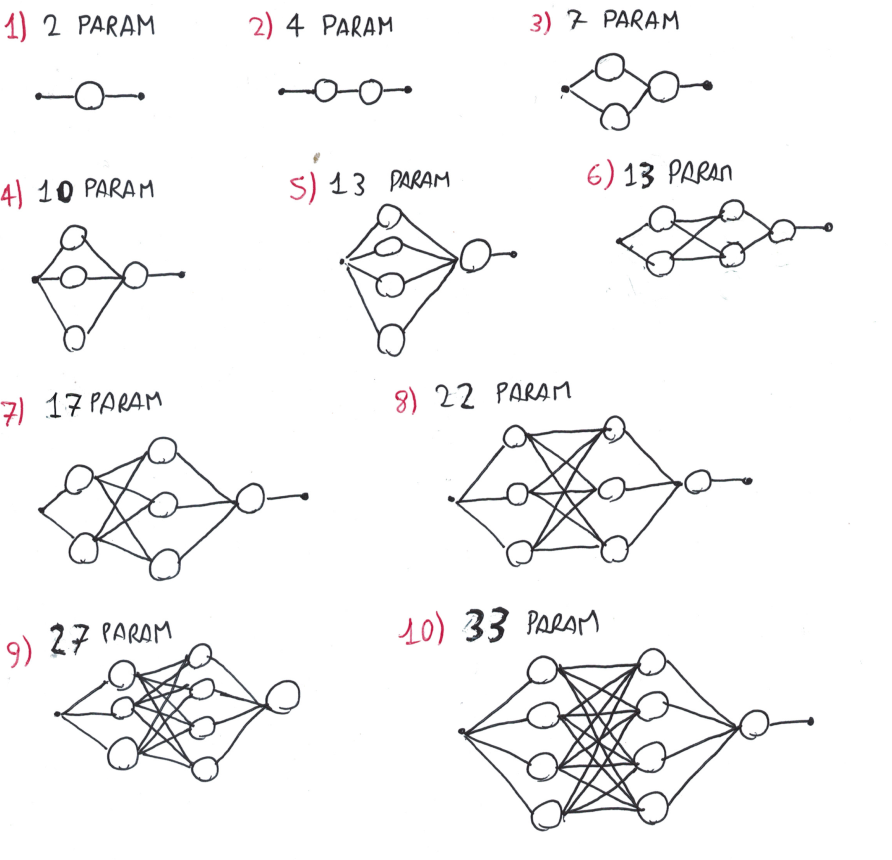

###### SUPERMODELS:
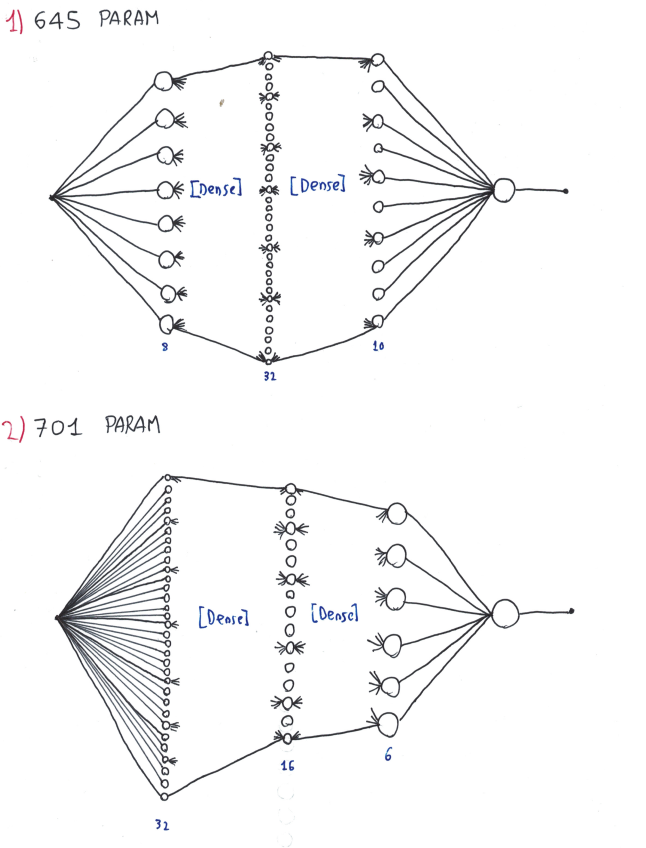

In [15]:
def f(x):
    return 4 - 3*x - 2*x**2 + 3*x**3

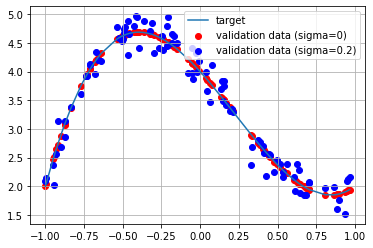

In [16]:
N_train=2000
N_valid=100
N_epochs=100

np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_valid)
x_valid.sort()
y_target = f(x_valid) 

sigma = 0.0
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

sigma = 0.2
y_train_noise = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid_noise = np.random.normal(f(x_valid), sigma)

# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data (sigma=0)')
plt.scatter(x_valid, y_valid_noise, color='b', label='validation data (sigma=0.2)')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# compose the 10 NN models

loss = np.zeros(10)
loss_noise = np.zeros(10)
superloss = np.zeros(2)
superloss_noise = np.zeros(2)

model0 = tf.keras.Sequential()
model0.add(Dense(1, input_shape=(1,), activation=None))

model1 = tf.keras.Sequential()
model1.add(Dense(1, input_shape=(1,), activation='selu'))
model1.add(Dense(1, activation=None))

model2 = tf.keras.Sequential()
model2.add(Dense(2, input_shape=(1,), activation='selu'))
model2.add(Dense(1, activation=None))

model3 = tf.keras.Sequential()
model3.add(Dense(3, input_shape=(1,), activation='selu'))
model3.add(Dense(1, activation=None))

model4 = tf.keras.Sequential()
model4.add(Dense(4, input_shape=(1,), activation='selu'))
model4.add(Dense(1, activation=None))

model5 = tf.keras.Sequential()
model5.add(Dense(2, input_shape=(1,), activation='selu'))
model5.add(Dense(2, activation='selu'))
model5.add(Dense(1, activation=None))

model6 = tf.keras.Sequential()
model6.add(Dense(2, input_shape=(1,), activation='selu'))
model6.add(Dense(3, activation='selu'))
model6.add(Dense(1, activation=None))

model7 = tf.keras.Sequential()
model7.add(Dense(3, input_shape=(1,), activation='selu'))
model7.add(Dense(3, activation='selu'))
model7.add(Dense(1, activation=None))

model8 = tf.keras.Sequential()
model8.add(Dense(3, input_shape=(1,), activation='selu'))
model8.add(Dense(4, activation='selu'))
model8.add(Dense(1, activation=None))

model9 = tf.keras.Sequential()
model9.add(Dense(4, input_shape=(1,), activation='selu'))
model9.add(Dense(4, activation='selu'))
model9.add(Dense(1, activation=None))

supermodel0 = tf.keras.Sequential()
supermodel0.add(Dense(8, input_shape=(1,), activation='selu'))
supermodel0.add(Dense(32, activation='selu'))
supermodel0.add(Dense(10, activation='selu'))
supermodel0.add(Dense(1, activation=None))

supermodel1 = tf.keras.Sequential()
supermodel1.add(Dense(32, input_shape=(1,), activation='selu'))
supermodel1.add(Dense(16, activation='selu'))
supermodel1.add(Dense(6, activation='selu'))
supermodel1.add(Dense(1, activation=None))

model0_noise = tf.keras.Sequential()
model0_noise.add(Dense(1, input_shape=(1,), activation=None))

model1_noise = tf.keras.Sequential()
model1_noise.add(Dense(1, input_shape=(1,), activation='selu'))
model1_noise.add(Dense(1, activation=None))

model2_noise = tf.keras.Sequential()
model2_noise.add(Dense(2, input_shape=(1,), activation='selu'))
model2_noise.add(Dense(1, activation=None))

model3_noise = tf.keras.Sequential()
model3_noise.add(Dense(3, input_shape=(1,), activation='selu'))
model3_noise.add(Dense(1, activation=None))

model4_noise = tf.keras.Sequential()
model4_noise.add(Dense(4, input_shape=(1,), activation='selu'))
model4_noise.add(Dense(1, activation=None))

model5_noise = tf.keras.Sequential()
model5_noise.add(Dense(2, input_shape=(1,), activation='selu'))
model5_noise.add(Dense(2, activation='selu'))
model5_noise.add(Dense(1, activation=None))

model6_noise = tf.keras.Sequential()
model6_noise.add(Dense(2, input_shape=(1,), activation='selu'))
model6_noise.add(Dense(3, activation='selu'))
model6_noise.add(Dense(1, activation=None))

model7_noise = tf.keras.Sequential()
model7_noise.add(Dense(3, input_shape=(1,), activation='selu'))
model7_noise.add(Dense(3, activation='selu'))
model7_noise.add(Dense(1, activation=None))

model8_noise = tf.keras.Sequential()
model8_noise.add(Dense(3, input_shape=(1,), activation='selu'))
model8_noise.add(Dense(4, activation='selu'))
model8_noise.add(Dense(1, activation=None))

model9_noise = tf.keras.Sequential()
model9_noise.add(Dense(4, input_shape=(1,), activation='selu'))
model9_noise.add(Dense(4, activation='selu'))
model9_noise.add(Dense(1, activation=None))

supermodel0_noise = tf.keras.Sequential()
supermodel0_noise.add(Dense(8, input_shape=(1,), activation='selu'))
supermodel0_noise.add(Dense(32, activation='selu'))
supermodel0_noise.add(Dense(10, activation='selu'))
supermodel0_noise.add(Dense(1, activation=None))

supermodel1_noise = tf.keras.Sequential()
supermodel1_noise.add(Dense(32, input_shape=(1,), activation='selu'))
supermodel1_noise.add(Dense(16, activation='selu'))
supermodel1_noise.add(Dense(6, activation='selu'))
supermodel1_noise.add(Dense(1, activation=None))


model_array = [model0,model1,model2,model3,model4,model5,model6,model7,model8,model9]
supermodel_array = [supermodel0,supermodel1]
model_array_noise = [model0_noise,model1_noise,model2_noise,model3_noise,model4_noise,model5_noise,model6_noise,model7_noise,model8_noise,model9_noise]
supermodel_array_noise = [supermodel0_noise,supermodel1_noise]

for model in model_array:
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    model.summary()

for supermodel in supermodel_array:
    supermodel.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    supermodel.summary()
    
for model in model_array_noise:
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    model.summary()

for supermodel in supermodel_array_noise:
    supermodel.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    supermodel.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 1)                 2         
                                                                 
 dense_33 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_33"
___________________

In [18]:
# ATTENTION: IT TAKES SEVERAL (AROUND 10) MINUTES

history_array = [model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=N_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid)) for model in model_array]

superhistory_array = [model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=N_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid)) for model in supermodel_array]

history_array_noise = [model.fit(x=x_train, y=y_train_noise, 
          batch_size=32, epochs=N_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid_noise)) for model in model_array_noise]

superhistory_array_noise = [model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=N_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid)) for model in supermodel_array_noise]

Epoch 1/100
63/63 [==============================] - 1s 4ms/step - loss: 5.1518 - mse: 5.1518 - val_loss: 1.9853 - val_mse: 1.9853
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 1.1089 - mse: 1.1089 - val_loss: 0.8733 - val_mse: 0.8733
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6827 - mse: 0.6827 - val_loss: 0.7100 - val_mse: 0.7100
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6055 - mse: 0.6055 - val_loss: 0.6712 - val_mse: 0.6712
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5815 - mse: 0.5815 - val_loss: 0.6606 - val_mse: 0.6606
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5721 - mse: 0.5721 - val_loss: 0.6563 - val_mse: 0.6563
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5682 - mse: 0.5682 - val_loss: 0.6562 - val_mse: 0.6562
Epoch 8/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5667 - m

In [19]:
# evaluate model
i=0
for model in model_array:
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
    loss[i]=score[0]
    i=i+1

i=0
for supermodel in supermodel_array:
    score = supermodel.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
    superloss[i]=score[0]
    i=i+1

i=0
for model in model_array_noise:
    score = model.evaluate(x_valid, y_valid_noise, batch_size=32, verbose=1)
    loss_noise[i]=score[0]
    i=i+1

i=0
for supermodel in supermodel_array_noise:
    score = supermodel.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
    superloss_noise[i]=score[0]
    i=i+1

4/4 [==============================] - 0s 4ms/step - loss: 0.0016 - mse: 0.0016


The graphs below represent for both data without noise and data with noise:
- Loss values after 100 epochs as a function of the number of network parameters for both models and supermodels;
- The history of loss values as a function of epochs for all models and supermodels



Comments: 


1) All comments that follow are to be taken with caution, because the random component of the algorithm may influence the results (e.g.: the 17-parameter model in a first execution appeared to be bad, but was probably just 'unlucky', given the similarity with the slightly simpler model and the slightly more complex mode).\
2) The first two models are inadequate for polynomial fit because they have too few parameters.\
3) Among the other eight models, as the complexity of the network increases, there is an improvement, but this improvement is very slight, so that I can consider the eight networks essentially equivalent for this problem.\
4) The two supermodels have about 10 times the parameters of the models and give about 10 times better results, but in the end I think they are not needed to address this problem.\
5) The inclusion of noise makes the results slightly worse.

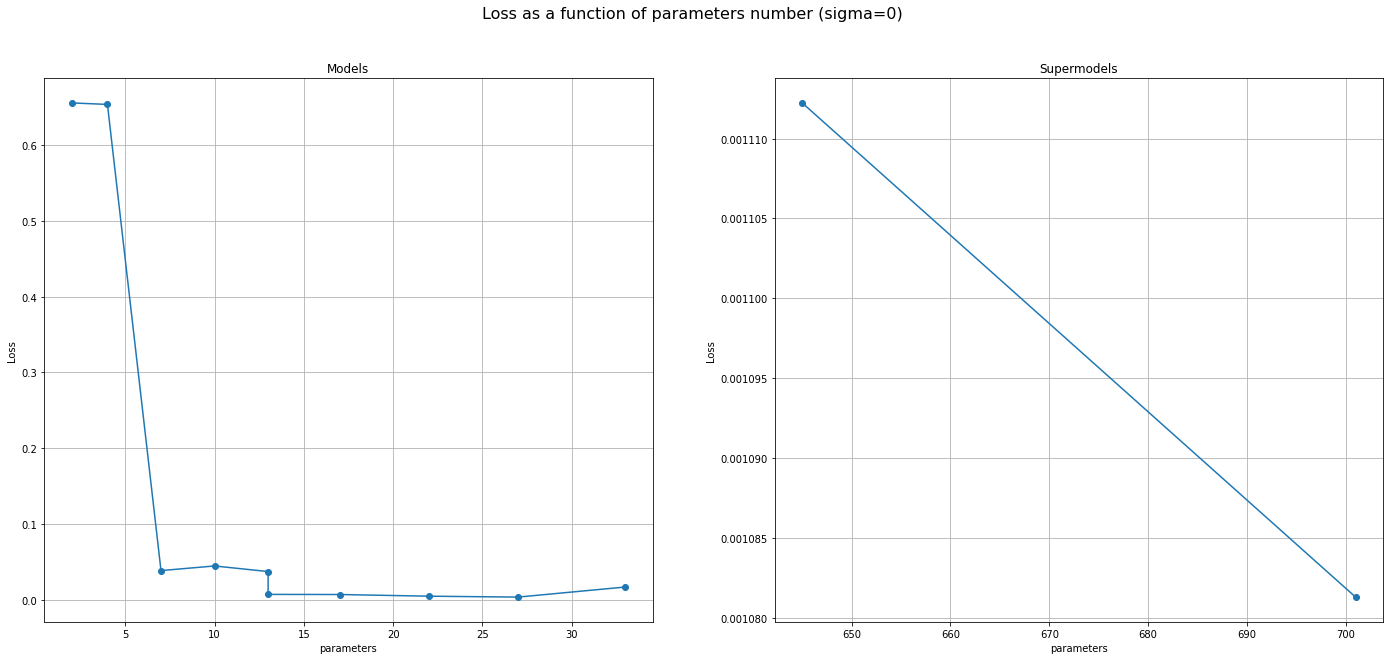

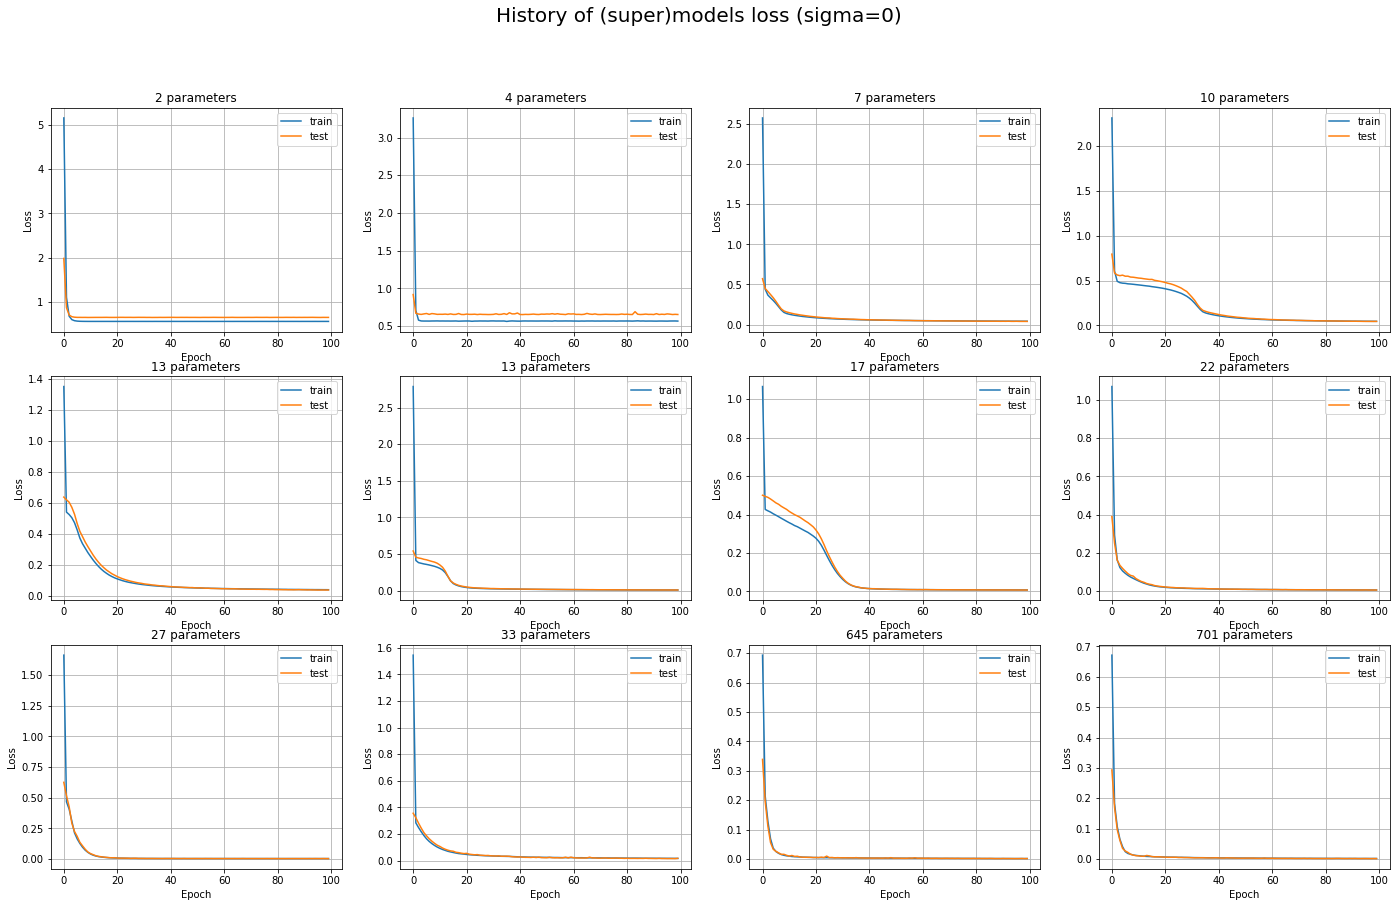

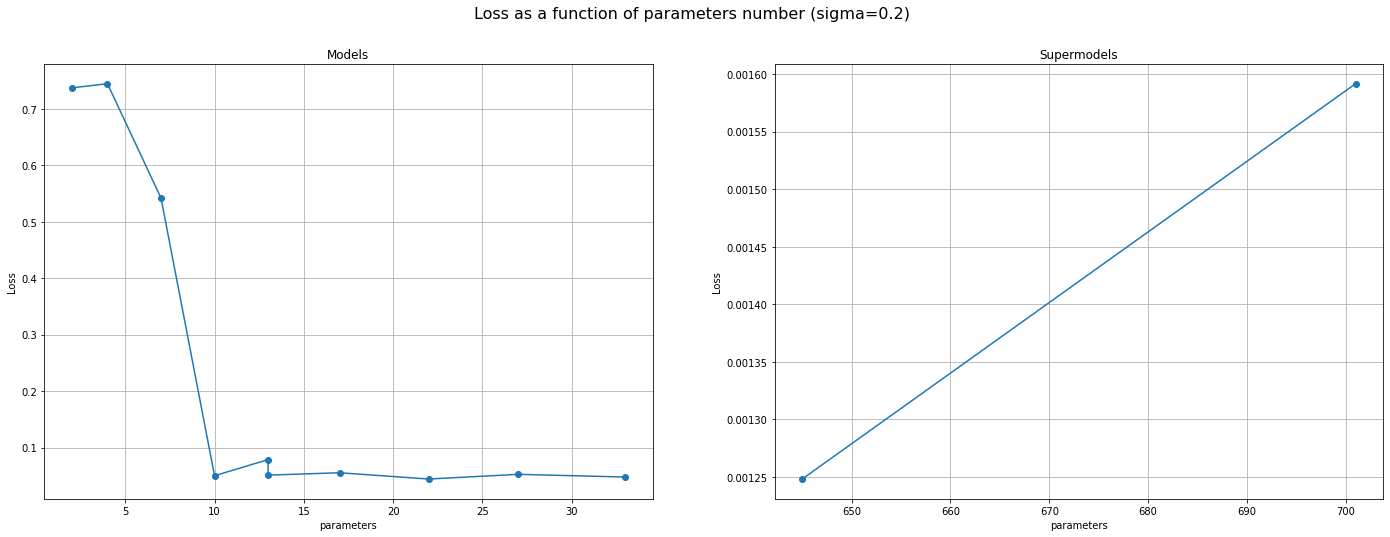

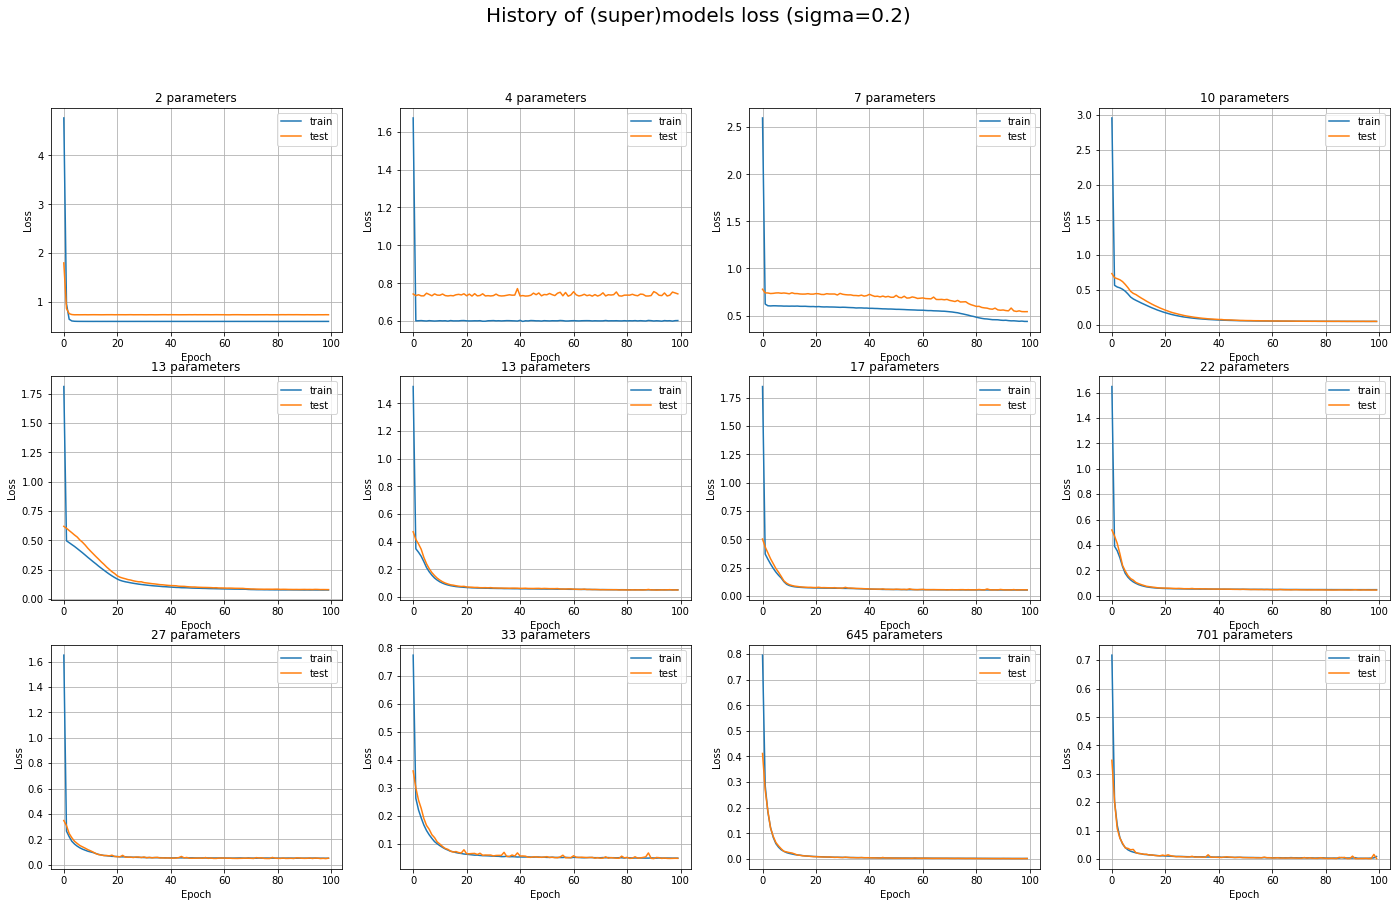

In [20]:
param = [2, 4, 7, 10, 13, 13, 17, 22, 27, 33]
param_lab = ['2', '4', '7', '10', '13', '13', '17', '22', '27', '33']
superparam = [645, 701]
superparam_lab = ['645', '701']

fig, plots= plt.subplots(1,2, figsize=(24,10))
fig.suptitle('Loss as a function of parameters number (sigma=0)', size=16)
plots[0].plot(param, loss,  marker='o')
plots[0].set_title('Models')
plots[0].set_ylabel('Loss')
plots[0].set_xlabel('parameters')
plots[0].grid(True)
plots[1].plot(superparam, superloss,  marker='o')
plots[1].set_title('Supermodels')
plots[1].set_ylabel('Loss')
plots[1].set_xlabel('parameters')
plots[1].grid(True)
plt.show()

fig, plots= plt.subplots(3,4, figsize=(24,14))
fig.suptitle("History of (super)models loss (sigma=0)", size=20)
plots = plots.ravel()
i=0
for history in history_array:
    plots[i].plot(history.history['loss'], label='train')
    plots[i].plot(history.history['val_loss'], label='test')
    plots[i].legend()
    plots[i].grid(True)
    plots[i].set_title(param_lab[i]+' parameters')
    plots[i].set_ylabel('Loss')
    plots[i].set_xlabel('Epoch') 
    i=i+1
for history in superhistory_array:
    plots[i].plot(history.history['loss'], label='train')
    plots[i].plot(history.history['val_loss'], label='test')
    plots[i].legend()
    plots[i].grid(True)
    plots[i].set_title(superparam_lab[i-10]+' parameters')
    plots[i].set_ylabel('Loss')
    plots[i].set_xlabel('Epoch') 
    i=i+1
plt.show()

fig, plots= plt.subplots(1,2, figsize=(24,8))
fig.suptitle('Loss as a function of parameters number (sigma=0.2)', size=16)
plots[0].plot(param, loss_noise,  marker='o')
plots[0].set_title('Models')
plots[0].set_ylabel('Loss')
plots[0].set_xlabel('parameters')
plots[0].grid(True)
plots[1].plot(superparam, superloss_noise,  marker='o')
plots[1].set_title('Supermodels')
plots[1].set_ylabel('Loss')
plots[1].set_xlabel('parameters')
plots[1].grid(True)
plt.show()

fig, plots= plt.subplots(3,4, figsize=(24,14))
fig.suptitle("History of (super)models loss (sigma=0.2)", size=20)
plots = plots.ravel()
i=0
for history in history_array_noise:
    plots[i].plot(history.history['loss'], label='train')
    plots[i].plot(history.history['val_loss'], label='test')
    plots[i].legend()
    plots[i].grid(True)
    plots[i].set_title(param_lab[i]+' parameters')
    plots[i].set_ylabel('Loss')
    plots[i].set_xlabel('Epoch') 
    i=i+1
for history in superhistory_array_noise:
    plots[i].plot(history.history['loss'], label='train')
    plots[i].plot(history.history['val_loss'], label='test')
    plots[i].legend()
    plots[i].grid(True)
    plots[i].set_title(superparam_lab[i-10]+' parameters')
    plots[i].set_ylabel('Loss')
    plots[i].set_xlabel('Epoch') 
    i=i+1
plt.show()

The graphs below represent, for both data without noise and data with noise, the prediction on new data in [-1.5,1.5], interval slightly larger than the [-1,1] domain of the training data.

The observations made above can also be read from this graph, where we see the greater effectiveness of supermodels and the ineffectiveness of oversimplified models.

A further observation can be made: all models and supermodels, despite being valid in the range in which the training data were estarted, are totally ineffective outside this range. This should not be surprising, because neural networks have been trained to recognize data, even new data, but of the form of the training data, so it is unable to work well on data of an unknown form.

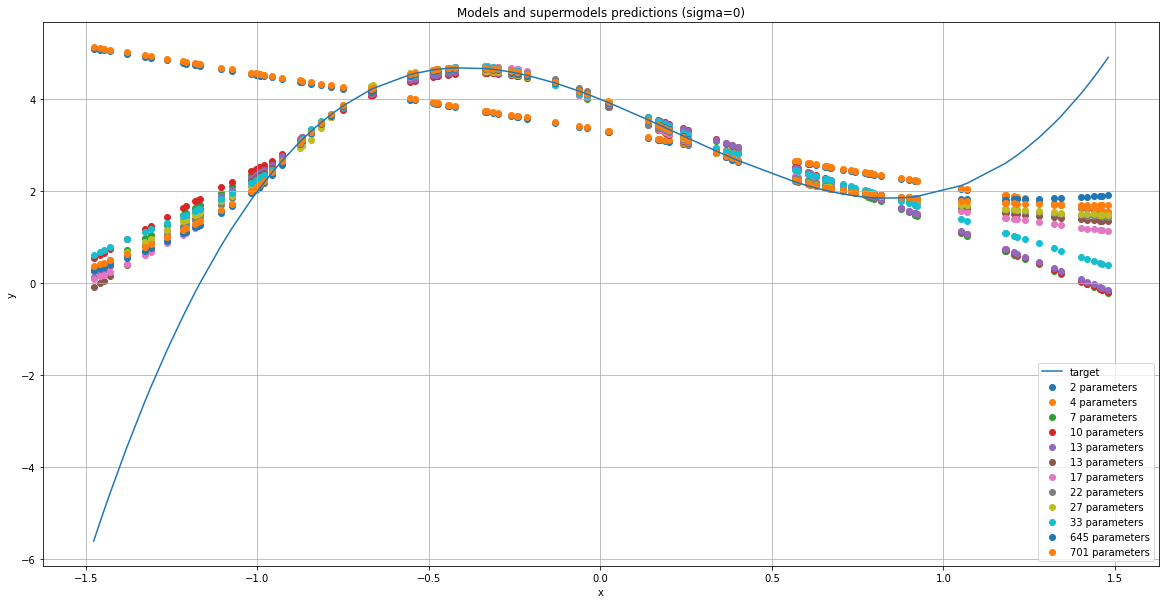

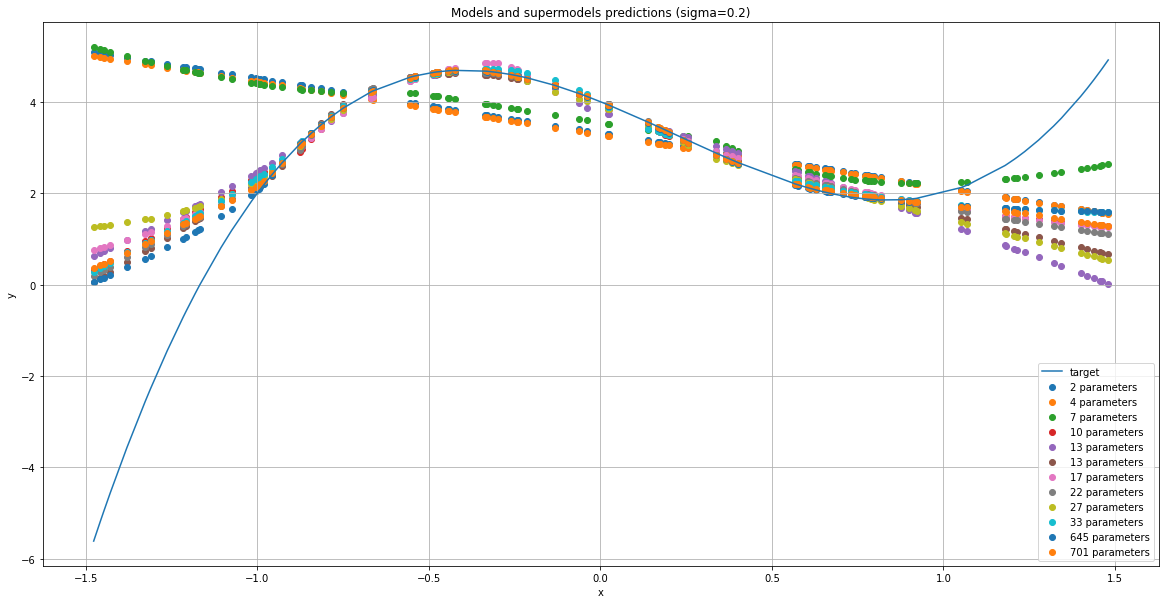

In [21]:
x_predicted = np.random.uniform(-1.5, 1.5, 100)
x_predicted.sort()
y_target = f(x_predicted)
a=['1','2','3','4','5','6','7','8','9','10']

j=0
plt.figure(figsize=(20,10))
for model in model_array:
  y_predicted = model.predict(x_predicted)
  plt.scatter(x_predicted, y_predicted, label=param_lab[j]+' parameters') 
  j=j+1
for model in supermodel_array:
  y_predicted = model.predict(x_predicted)
  plt.scatter(x_predicted, y_predicted, label=superparam_lab[j-10]+' parameters') 
  j=j+1
plt.plot(x_predicted, y_target, label='target')
plt.title("Models and supermodels predictions (sigma=0)")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

j=0
plt.figure(figsize=(20,10))
for model in model_array_noise:
  y_predicted = model.predict(x_predicted)
  plt.scatter(x_predicted, y_predicted, label=param_lab[j]+' parameters') 
  j=j+1
for model in supermodel_array_noise:
  y_predicted = model.predict(x_predicted)
  plt.scatter(x_predicted, y_predicted, label=superparam_lab[j-10]+' parameters') 
  j=j+1
plt.plot(x_predicted, y_target, label='target')
plt.title("Models and supermodels predictions (sigma=0.2)")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

## <span style="color:blue">Exercise 11.3</span>

This exercise again consists of performing a regression, this time for a 2D function f, defined as

$$f(x,y) = \sin(x^2+y^2)$$
in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.


The problem does not seem much more complex than the polynomial fit of exercise 11.2, so I will use one of the models developed above.
Since we have two variables here and so the problem is slightly more complex, I will use the most complex of the few-parameter models, namely the 33-parameter 4-4-1 neural network (who becomes 37-parameter because of the double input) described above, with the same settings as before (100 epochs, 2000 training data, sgd optimizer, loss mse, selu activation functions for all but the output layer) and without noise. 

I then represent three graphs:
- function with validation data;
- history of loss function;
- predictions on new data.

In reality, with these settings, the graph of the loss function history for the training and test data seemed to be wrong, because the training loss was greater than the test loss. I tried changing some settings, and I found that by changing the seed of the random number generator this error sometimes appeared, sometimes not. I think the reason is that the function is very steep at the edges of the domain, so the model can't do the regression well in those parts. So depending on the seed of the generator, the training and test data are more or less concentrated near the edges, and this drastically affects the loss function. One would have to raise the number of training and test data by a lot to have points more and more evenly distributed in the square. I raised the number of training and test data to (3000-300) but the graph still has irregularities.

In [41]:
import math

def f(x,y):
    return np.sin(x**2+y**2)

Text(0.5, 0.92, 'Function and Validation data')

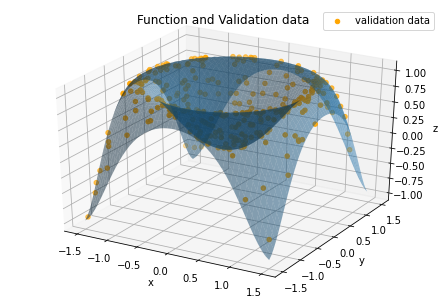

In [67]:
from mpl_toolkits.mplot3d import Axes3D
N_train=3000
N_valid=300
N_epochs=100

np.random.seed(0)
x1_train = np.random.uniform(-1.5, 1.5, N_train)
x2_train = np.random.uniform(-1.5, 1.5, N_train)
x_train = np.matrix([
    (x1_train[i],x2_train[i])
    for i in range(N_train)])

x1_valid = np.random.uniform(-1.5, 1.5, N_valid)
x2_valid = np.random.uniform(-1.5, 1.5, N_valid)
x_valid = np.matrix([
    (x1_valid[i],x2_valid[i])
    for i in range(N_valid)])

y_target = f(x1_valid, x2_valid)

sigma = 0.0
y_valid = np.random.normal(f(x1_valid, x2_valid), sigma)
y_train = np.random.normal(f(x1_train, x2_train), sigma)

# plot validation and target dataset

fig = plt.figure()
ax = Axes3D(fig)

x = np.outer(np.linspace(-1.5, 1.5, 50), np.ones(50))
y = x.copy().T
z = np.sin(x** 2 + y** 2)

ax.plot_surface(x,y,z, alpha=.5)
ax.scatter(x1_valid, x2_valid, y_valid, marker='o', color='orange', label='validation data')#c=Z
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
ax.set_title("Function and Validation data")

In [68]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(4, input_shape=(2,), activation='selu'))
model.add(Dense(4, activation='selu'))
model.add(Dense(1, activation=None))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 4)                 12        
                                                                 
 dense_59 (Dense)            (None, 4)                 20        
                                                                 
 dense_60 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [69]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=N_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.2432 - mse: 0.2432 - val_loss: 0.1535 - val_mse: 0.1535
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1537 - mse: 0.1537 - val_loss: 0.1496 - val_mse: 0.1496
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1523 - mse: 0.1523 - val_loss: 0.1445 - val_mse: 0.1445
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1444 - val_mse: 0.1444
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1505 - mse: 0.1505 - val_loss: 0.1434 - val_mse: 0.1434
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1491 - mse: 0.1491 - val_loss: 0.1401 - val_mse: 0.1401
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1486 - mse: 0.1486 - val_loss: 0.1417 - val_mse: 0.1417
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1478 - m

In [70]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])

10/10 [==============================] - 0s 4ms/step - loss: 0.0582 - mse: 0.0582

Test loss: 0.05819035694003105


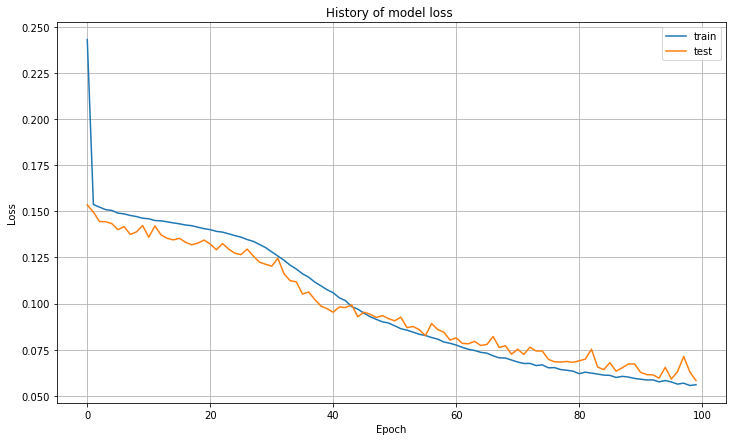

In [71]:
# look into training history
# Plot training & validation loss values

plt.figure(figsize=(12,7))
plt.title("History of model loss ")
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.grid(True)
plt.ylabel('Loss')
plt.xlabel('Epoch') 

plt.show()

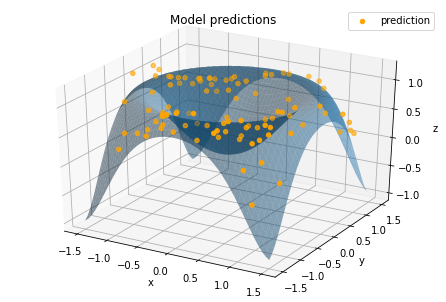

In [73]:
#prediction

x1_predicted = np.random.uniform(-1.5, 1.5, 100)
x2_predicted = np.random.uniform(-1.5, 1.5, 100)

x_predicted = np.matrix([
    (x1_predicted[i],x2_predicted[i])
    for i in range(100)])
y_predicted = model.predict(x_predicted)

fig = plt.figure()
ax = Axes3D(fig)

x = np.outer(np.linspace(-1.5, 1.5, 50), np.ones(50))
y = x.copy().T
z = np.sin(x** 2 + y** 2)
ax.plot_surface(x,y,z, alpha=.5)

ax.scatter(x1_predicted, x2_predicted, y_predicted, marker='o', color='orange', label='prediction')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Model predictions")
ax.legend()

plt.show()